In [2]:
import networkx as nx
from networkx import *
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from nltk import sent_tokenize,word_tokenize
import numpy as np

import sys
sys.path.append('../..')
sys.path.append('../../utils/')
from utils import *
import operator


import fastText
model = fastText.load_model('../../../Divers_Data_Maitrise/wiki.simple/wiki.simple.bin')

#ignorer toutes les depreciations de fonctions
import warnings
warnings.simplefilter('ignore')

In [29]:
def Alignement_graph_bipartite(question,sequence, list_alignements):
    '''
    Fonction qui crée un graphe bipartit (question, sentence) et qui affecte la similarité 
    cosine comme poids de chaque arete. L'arete en trait plein represente la plus forte similaritée,
    les autres similarite seront affichées avec des traits discontinus.
    :list_alignements: les alignements reliser par l'algo
    '''
    
    G=nx.Graph()

    list_words_question = word_tokenize(question.lower())
    list_words_sequence = word_tokenize(sequence.lower())
    
    
    nb_words_question = len(list_words_question)
    nb_words_sequence = len(list_words_sequence)
    height_colum = max(nb_words_question,nb_words_sequence)
    y_linspace_question = np.linspace(0,height_colum,nb_words_question)
    y_linspace_sentence = np.linspace(0,height_colum,nb_words_sequence)
    
    fixed_positions={}
    labels={}
    
    
    list_edges = []
    edge_labels = {}
    for i in range(0,nb_words_sequence): # mots de la phrase
        num_node = nb_words_question + i
        G.add_node(num_node)
        labels[num_node]=list_words_sequence[i]
        
        fixed_positions[num_node] = (2,y_linspace_sentence[nb_words_sequence-i-1])
    
    for i in range(0,nb_words_question): # mots de la question
        G.add_node(i)
        labels[i]=list_words_question[i]
        fixed_positions[i] = (0,y_linspace_question[nb_words_question-i-1])
    
    for elem in list_alignements:
        G.add_edge(elem[0][0],elem[0][1] + nb_words_question,sim=elem[1])
        list_edges.append((elem[0][0],elem[0][1] + nb_words_question))
        edge_labels[(elem[0][0],elem[0][1] + nb_words_question)]=elem[1]
        
    pos = nx.spring_layout(G,pos=fixed_positions, fixed=fixed_positions.keys())
    plt.figure(3,figsize=(15,height_colum*1.75))
    nx.draw_networkx_nodes(G,pos,node_color='w',node_size=2500)
    nx.draw_networkx_labels(G,pos,labels,font_size=14)
    nx.draw_networkx_edge_labels(G,pos,node_color='b',edge_labels=edge_labels, label_pos=0.72)
    nx.draw_networkx_edges(G,pos,node_color='b', edgelist =list_edges,  width = 1.0)
    
    plt.axis('off')
#     plt.savefig("Graph.png", format="PNG") # pour enregistrer l'image dans un fichier
    plt.show()

In [59]:
def affiche_table_cosine(question,sequence):
    list_words_question = word_tokenize(question.lower())
    list_words_sequence = word_tokenize(sequence.lower())
    
    dict_table = {}
    
    for word_question in list_words_question:
        dict_table[word_question] = []
        vect_word_question = model.get_word_vector(word_question)
        for word_sentence in list_words_sequence:
            vect_word_sentence = model.get_word_vector(word_sentence)
            sim = cosine_similarity(vect_word_sentence, vect_word_question)
            dict_table[word_question].append(sim)
    df = pd.DataFrame(dict_table, index=list_words_sequence)
    print(df)

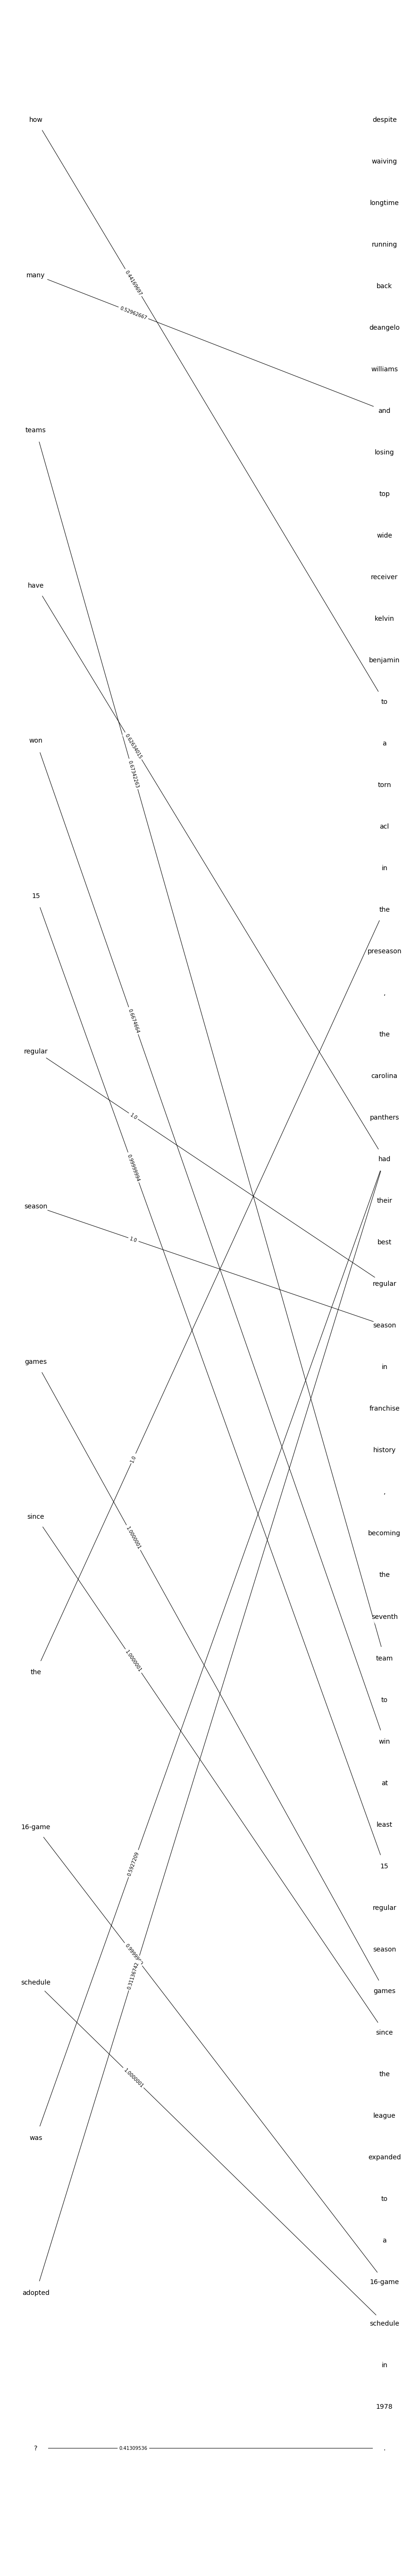

                how      many     teams      have       won        15  \
despite    0.180111  0.297788  0.141456  0.334557  0.176312  0.033477   
waiving    0.263417  0.279821  0.228723  0.335760  0.208942  0.098574   
longtime   0.105054  0.260237  0.198382  0.171893  0.216077  0.109043   
running    0.227199  0.248257  0.217001  0.286345  0.292591  0.050586   
back       0.255732  0.251295  0.197347  0.335931  0.202551  0.048293   
deangelo   0.159614  0.218451  0.191050  0.148227  0.200330 -0.018474   
williams   0.157942  0.172824  0.320829  0.257460  0.241178  0.135079   
and        0.336480  0.529627  0.219734  0.471179  0.279577  0.031420   
losing     0.232618  0.188162  0.246398  0.271993  0.461057  0.113969   
top        0.185462  0.201825  0.248208  0.245869  0.236787 -0.058112   
wide       0.209433  0.321058  0.114865  0.279591  0.099887 -0.056186   
receiver   0.177237  0.142125  0.272061  0.191896  0.246188 -0.032226   
kelvin     0.208951  0.096850  0.141148  0.172929  

In [79]:
Alignement_graph_bipartite( "How many teams have won 15 regular season games since the 16-game schedule was adopted?","Despite waiving longtime running back DeAngelo Williams and losing top wide receiver Kelvin Benjamin to a torn ACL in the preseason, the Carolina Panthers had their best regular season in franchise history, becoming the seventh team to win at least 15 regular season games since the league expanded to a 16-game schedule in 1978.",[((8, 45), 1.0000001), ((9, 46), 1.0000001), ((12, 53), 1.0000001), ((6, 28), 1.0), ((7, 29), 1.0), ((10, 19), 1.0), ((5, 42), 0.99999994), ((11, 52), 0.9999999), ((2, 37), 0.67342263), ((4, 39), 0.6674664), ((3, 25), 0.62634015), ((13, 25), 0.5927209), ((1, 7), 0.52962667), ((0, 14), 0.44169697), ((15, 56), 0.41309536), ((14, 25), 0.31136742)])
affiche_table_cosine("How many teams have won 15 regular season games since the 16-game schedule was adopted?","Despite waiving longtime running back DeAngelo Williams and losing top wide receiver Kelvin Benjamin to a torn ACL in the preseason, the Carolina Panthers had their best regular season in franchise history, becoming the seventh team to win at least 15 regular season games since the league expanded to a 16-game schedule in 1978.")
question=" How many teams have won 15 regular season games since the 16-game schedule was adopted? "
sequence=" Despite waiving longtime running back DeAngelo Williams and losing top wide receiver Kelvin Benjamin to a torn ACL in the preseason, the Carolina Panthers had their best regular season in franchise history, becoming the seventh team to win at least 15 regular season games since the league expanded to a 16-game schedule in 1978. "
print("question = ", question)
print("sequence = ",sequence)
print("span output: preseason , the ")
print("reponses attendu: [{'answer_start': 326, 'text': '7'}, {'answer_start': 220, 'text': 'seventh'}, {'answer_start': 220, 'text': 'seventh'}] ")

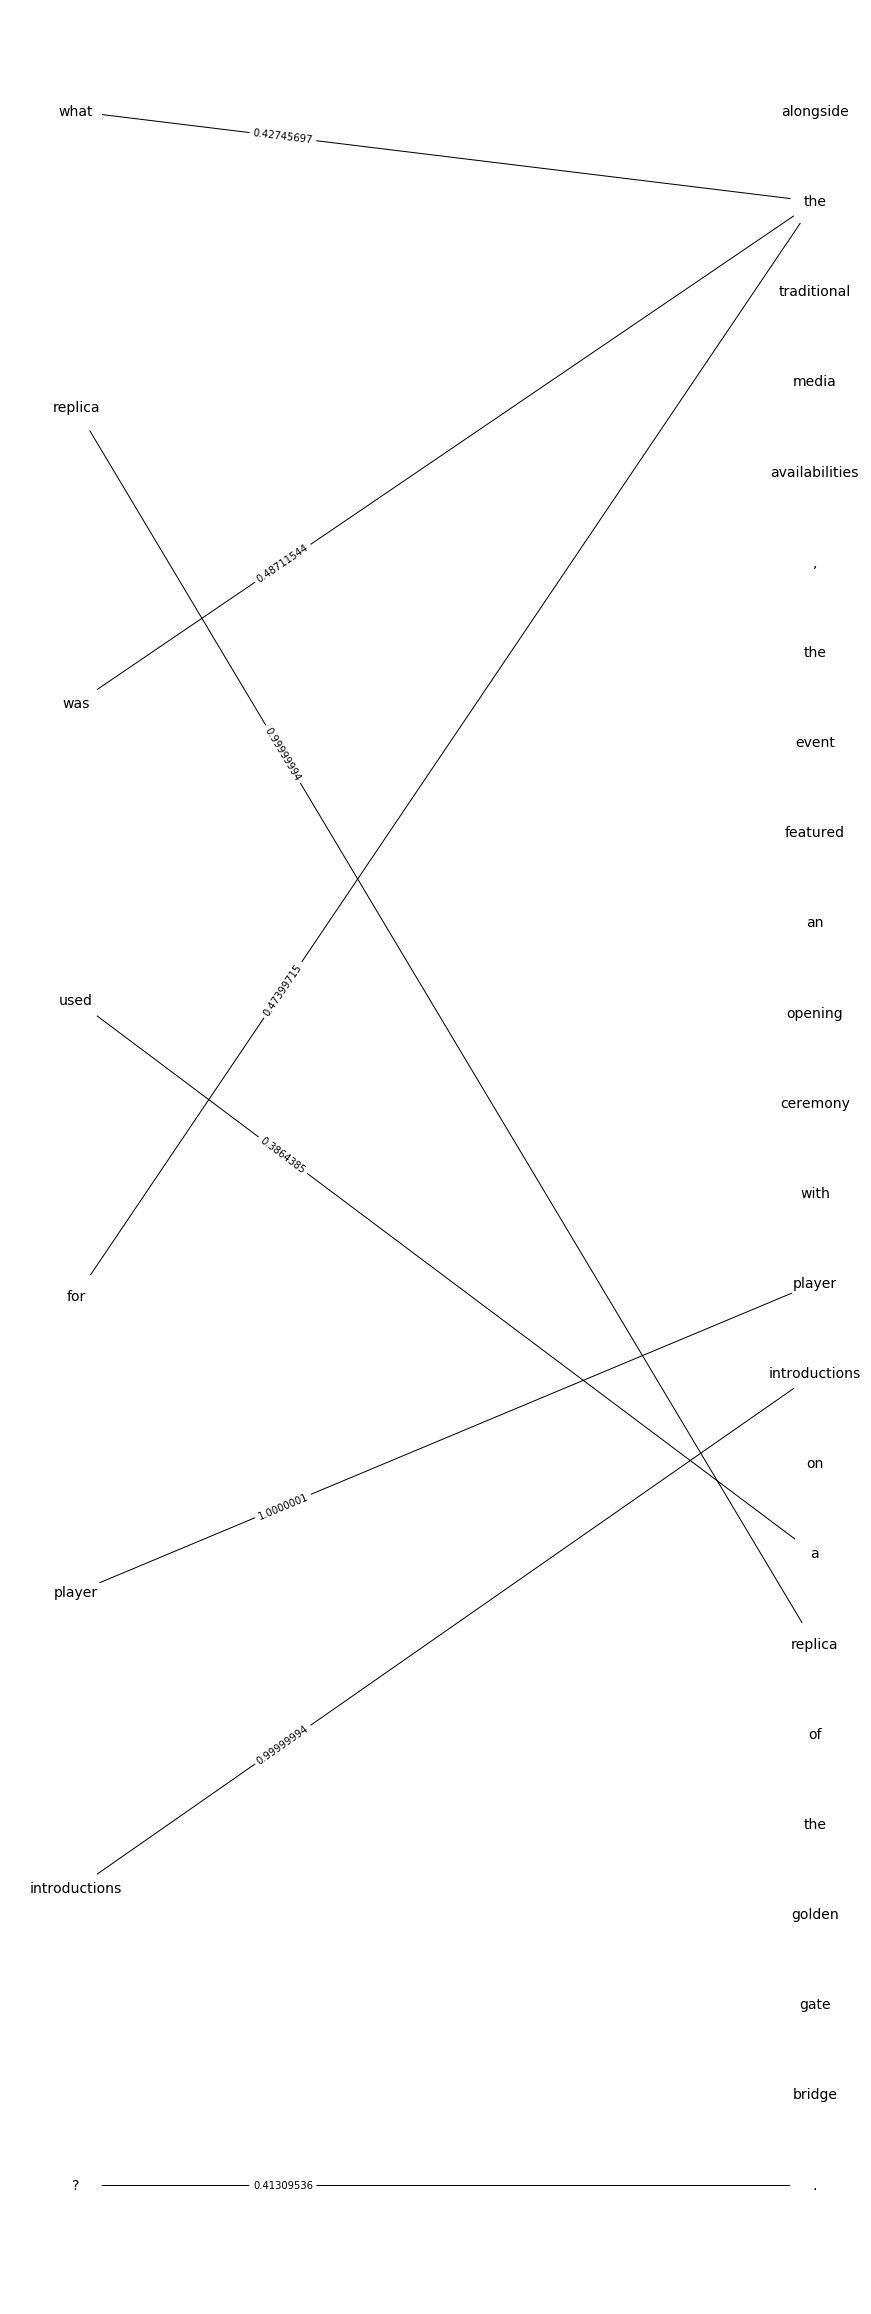

                    what   replica       was      used       for    player  \
alongside       0.154390  0.155846  0.186976  0.179456  0.216323  0.211146   
the             0.427457  0.257688  0.487115  0.371838  0.473997  0.199008   
traditional     0.200668  0.083898  0.178453  0.344156  0.243826  0.149032   
media           0.182921  0.114526  0.178418  0.193232  0.244234  0.208704   
availabilities  0.266779  0.159701  0.097925  0.344356  0.349357  0.070680   
,               0.308747  0.133075  0.454561  0.312040  0.446487  0.258263   
the             0.427457  0.257688  0.487115  0.371838  0.473997  0.199008   
event           0.269814  0.167502  0.283412  0.192439  0.216481  0.114942   
featured        0.203304  0.127840  0.306452  0.248458  0.307274  0.191346   
an              0.282188  0.169507  0.369437  0.257289  0.323671  0.172949   
opening         0.181467  0.256618  0.208176  0.188672  0.264928  0.189173   
ceremony        0.165814  0.139035  0.264487  0.188183  0.249879

In [80]:
Alignement_graph_bipartite( "What replica was used for player introductions?","Alongside the traditional media availabilities, the event featured an opening ceremony with player introductions on a replica of the Golden Gate Bridge.",[((5, 13), 1.0000001), ((1, 17), 0.99999994), ((6, 14), 0.99999994), ((2, 1), 0.48711544), ((4, 1), 0.47399715), ((0, 1), 0.42745697), ((7, 23), 0.41309536), ((3, 16), 0.3864385)])
affiche_table_cosine("What replica was used for player introductions?","Alongside the traditional media availabilities, the event featured an opening ceremony with player introductions on a replica of the Golden Gate Bridge.")
question=" What replica was used for player introductions? "
sequence=" Alongside the traditional media availabilities, the event featured an opening ceremony with player introductions on a replica of the Golden Gate Bridge. "
print("question = ", question)
print("sequence = ",sequence)
print("span output: traditional media availabilities , the event featured an opening ceremony with ")
print("reponses attendu: [{'answer_start': 362, 'text': 'the Golden Gate Bridge.'}, {'answer_start': 362, 'text': 'the Golden Gate Bridge'}, {'answer_start': 366, 'text': 'Golden Gate Bridge.'}] ")

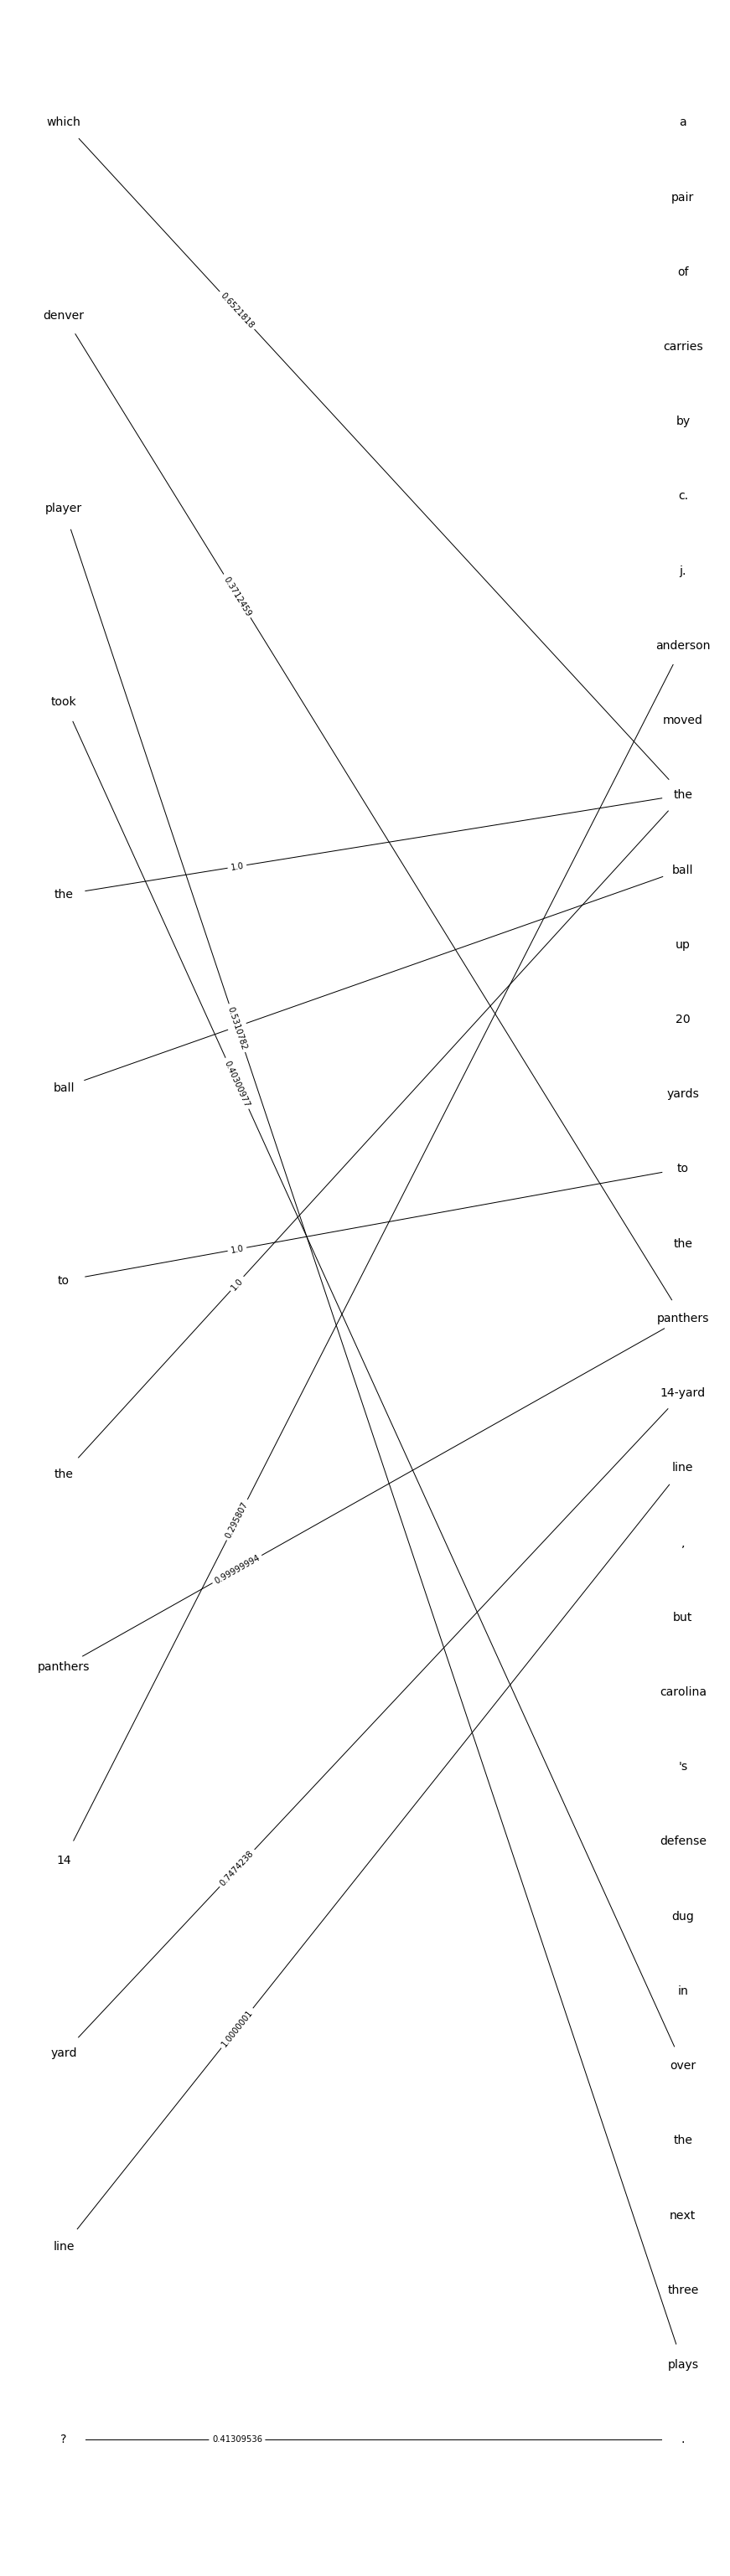

             which    denver    player      took       the      ball  \
a         0.568945  0.179860  0.259100  0.186970  0.582920  0.235783   
pair      0.362263  0.209477  0.139352  0.125482  0.264337  0.269339   
of        0.501163  0.145951  0.162704  0.276627  0.733189  0.151221   
carries   0.364848  0.181570  0.145414  0.221500  0.367862  0.243608   
by        0.405434  0.162416  0.136297  0.211697  0.440875  0.138162   
c.       -0.105577  0.007843 -0.001186 -0.156064 -0.234516 -0.079041   
j.       -0.031879  0.015842 -0.026113  0.003778  0.038010  0.004582   
anderson  0.158740  0.306904  0.183227  0.156157  0.224284  0.188931   
moved     0.183685  0.195104  0.111530  0.337987  0.320310  0.168430   
the       0.652182  0.205240  0.199008  0.316576  1.000000  0.188956   
ball      0.246269  0.193530  0.389311  0.093510  0.188956  1.000000   
up        0.363881  0.224063  0.139372  0.220300  0.384231  0.191362   
20       -0.061743 -0.002844 -0.107624 -0.060569 -0.064190 -0.13

In [88]:
Alignement_graph_bipartite( "Which Denver player took the ball to the Panthers 14 yard line?","A pair of carries by C. J. Anderson moved the ball up 20 yards to the Panthers 14-yard line, but Carolina's defense dug in over the next three plays.",[((11, 18), 1.0000001), ((4, 9), 1.0), ((5, 10), 1.0), ((6, 14), 1.0), ((7, 9), 1.0), ((8, 16), 0.99999994), ((10, 17), 0.7474238), ((0, 9), 0.6521818), ((2, 30), 0.5310782), ((12, 31), 0.41309536), ((3, 26), 0.40300977), ((1, 16), 0.3712459), ((9, 7), 0.295807)])
affiche_table_cosine("Which Denver player took the ball to the Panthers 14 yard line?","A pair of carries by C. J. Anderson moved the ball up 20 yards to the Panthers 14-yard line, but Carolina's defense dug in over the next three plays.")
question=" Which Denver player took the ball to the Panthers 14 yard line? "
sequence=" A pair of carries by C. J. Anderson moved the ball up 20 yards to the Panthers 14-yard line, but Carolina's defense dug in over the next three plays. "
print("question = ", question)
print("sequence = ",sequence)
print("span output: , but carolina 's defense dug in ")
print("reponses attendu: [{'answer_start': 197, 'text': 'C. J. Anderson'}, {'answer_start': 197, 'text': 'C. J. Anderson'}, {'answer_start': 203, 'text': 'Anderson'}] ")

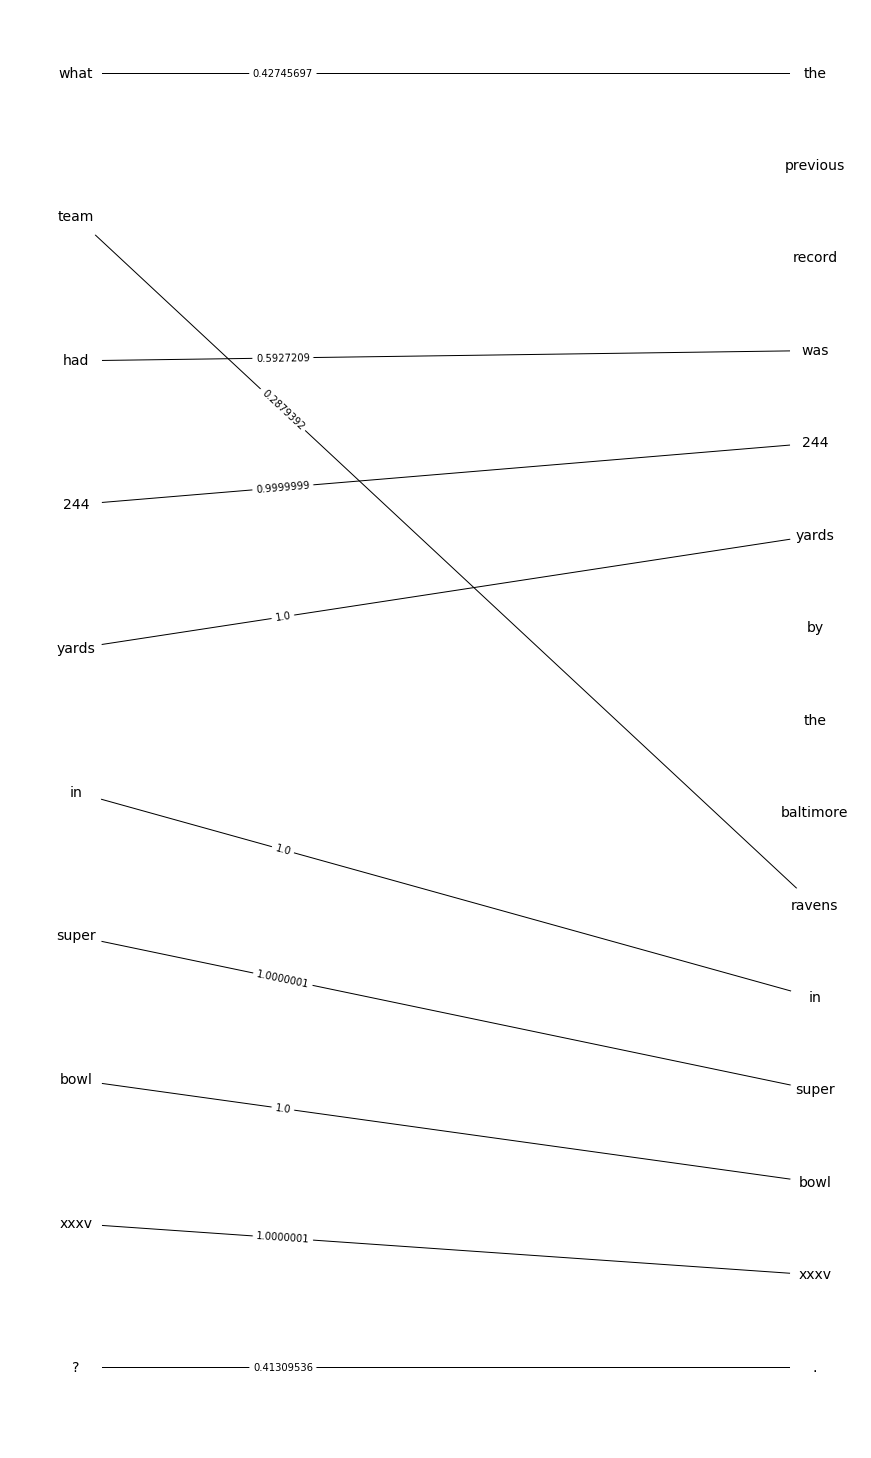

               what      team       had       244     yards        in  \
the        0.427457  0.225642  0.387585  0.260799  0.160703  0.666239   
previous   0.274369  0.166723  0.349143  0.064523  0.254882  0.231849   
record     0.177249  0.191061  0.247778 -0.002769  0.358748  0.231625   
was        0.221110  0.139865  0.592721  0.190548  0.182336  0.455141   
244        0.249027 -0.075941  0.231910  1.000000 -0.087157  0.211613   
yards      0.130480  0.179008  0.198945 -0.087157  1.000000  0.142066   
by         0.245548  0.128267  0.372941  0.232011  0.170805  0.370934   
the        0.427457  0.225642  0.387585  0.260799  0.160703  0.666239   
baltimore  0.133837  0.228147  0.217907  0.038187  0.350716  0.259703   
ravens     0.168566  0.287939  0.210888 -0.044273  0.420886  0.176617   
in         0.308086  0.188412  0.385027  0.211613  0.142066  1.000000   
super      0.136517  0.233397  0.172169  0.023673  0.227804  0.185760   
bowl       0.159425  0.204607  0.166146  0.008262  

In [83]:
Alignement_graph_bipartite( "What team had 244 yards in Super Bowl XXXV?","The previous record was 244 yards by the Baltimore Ravens in Super Bowl XXXV.",[((6, 11), 1.0000001), ((8, 13), 1.0000001), ((4, 5), 1.0), ((5, 10), 1.0), ((7, 12), 1.0), ((3, 4), 0.9999999), ((2, 3), 0.5927209), ((0, 0), 0.42745697), ((9, 14), 0.41309536), ((1, 9), 0.2879392)])
affiche_table_cosine("What team had 244 yards in Super Bowl XXXV?","The previous record was 244 yards by the Baltimore Ravens in Super Bowl XXXV.")
question=" What team had 244 yards in Super Bowl XXXV? "
sequence=" The previous record was 244 yards by the Baltimore Ravens in Super Bowl XXXV. "
print("question = ", question)
print("sequence = ",sequence)
print("span output: by the baltimore ")
print("reponses attendu: [{'answer_start': 308, 'text': 'Baltimore Ravens'}, {'answer_start': 304, 'text': 'the Baltimore Ravens'}, {'answer_start': 318, 'text': 'Ravens'}] ")

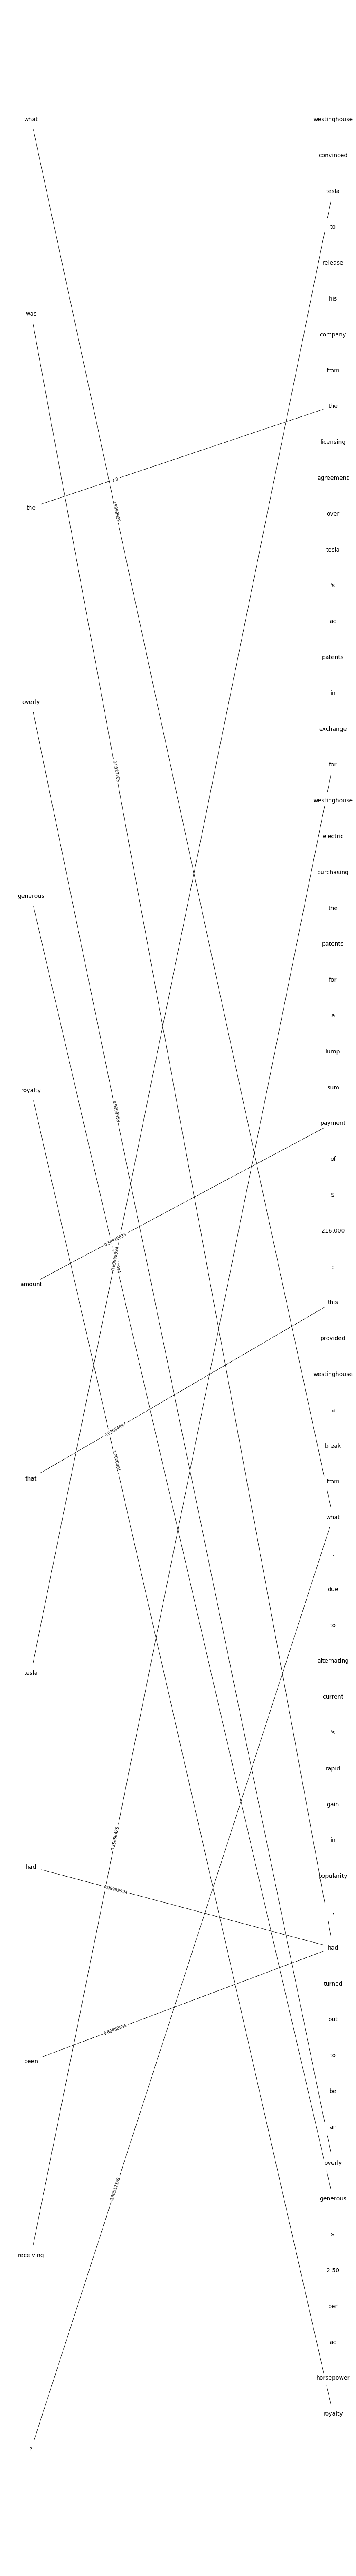

                  what       was       the    overly  generous   royalty  \
westinghouse  0.161263  0.307021  0.310110  0.113063  0.261997  0.231748   
convinced     0.360399  0.277561  0.195420  0.335847  0.345737  0.037891   
tesla         0.232212  0.164552  0.132440  0.100021  0.186601  0.196883   
to            0.455848  0.363635  0.535392  0.298518  0.293821  0.163435   
release       0.191222  0.213600  0.281477  0.167093  0.089774  0.148853   
his           0.269765  0.440525  0.439401  0.199102  0.402019  0.208541   
company       0.233377  0.229314  0.265917  0.067268  0.182533  0.297280   
from          0.273762  0.311715  0.401505  0.189311  0.178052  0.196394   
the           0.427457  0.487115  1.000000  0.199899  0.221497  0.217954   
licensing     0.286492  0.144392  0.243316  0.221517  0.252599  0.299009   
agreement     0.285109  0.239753  0.249070  0.185414  0.245677  0.203081   
over          0.280076  0.244864  0.398565  0.252698  0.218935  0.151160   
tesla       

In [84]:
Alignement_graph_bipartite( "What was the overly generous royalty amount that Tesla had been receiving? ","Westinghouse convinced Tesla to release his company from the licensing agreement over Tesla's AC patents in exchange for Westinghouse Electric purchasing the patents for a lump sum payment of $216,000; this provided Westinghouse a break from what, due to alternating current's rapid gain in popularity, had turned out to be an overly generous $2.50 per AC horsepower royalty.",[((5, 64), 1.0000001), ((2, 8), 1.0), ((4, 58), 0.99999994), ((8, 2), 0.99999994), ((9, 51), 0.99999994), ((0, 39), 0.9999999), ((3, 57), 0.9999999), ((7, 33), 0.69094497), ((10, 51), 0.60488856), ((1, 51), 0.5927209), ((12, 39), 0.50512385), ((6, 28), 0.38910833), ((11, 18), 0.35656425)])
affiche_table_cosine("What was the overly generous royalty amount that Tesla had been receiving? ","Westinghouse convinced Tesla to release his company from the licensing agreement over Tesla's AC patents in exchange for Westinghouse Electric purchasing the patents for a lump sum payment of $216,000; this provided Westinghouse a break from what, due to alternating current's rapid gain in popularity, had turned out to be an overly generous $2.50 per AC horsepower royalty.")
question=" What was the overly generous royalty amount that Tesla had been receiving?  "
sequence=" Westinghouse convinced Tesla to release his company from the licensing agreement over Tesla's AC patents in exchange for Westinghouse Electric purchasing the patents for a lump sum payment of $216,000; this provided Westinghouse a break from what, due to alternating current's rapid gain in popularity, had turned out to be an overly generous $2.50 per AC horsepower royalty. "
print("question = ", question)
print("sequence = ",sequence)
print("span output: purchasing the patents for a lump sum ")
print("reponses attendu: [{'answer_start': 1183, 'text': '$2.50 per AC horsepower royalty'}, {'answer_start': 1183, 'text': '$2.50 per AC horsepower'}, {'answer_start': 1183, 'text': '$2.50 per AC horsepower'}] ")


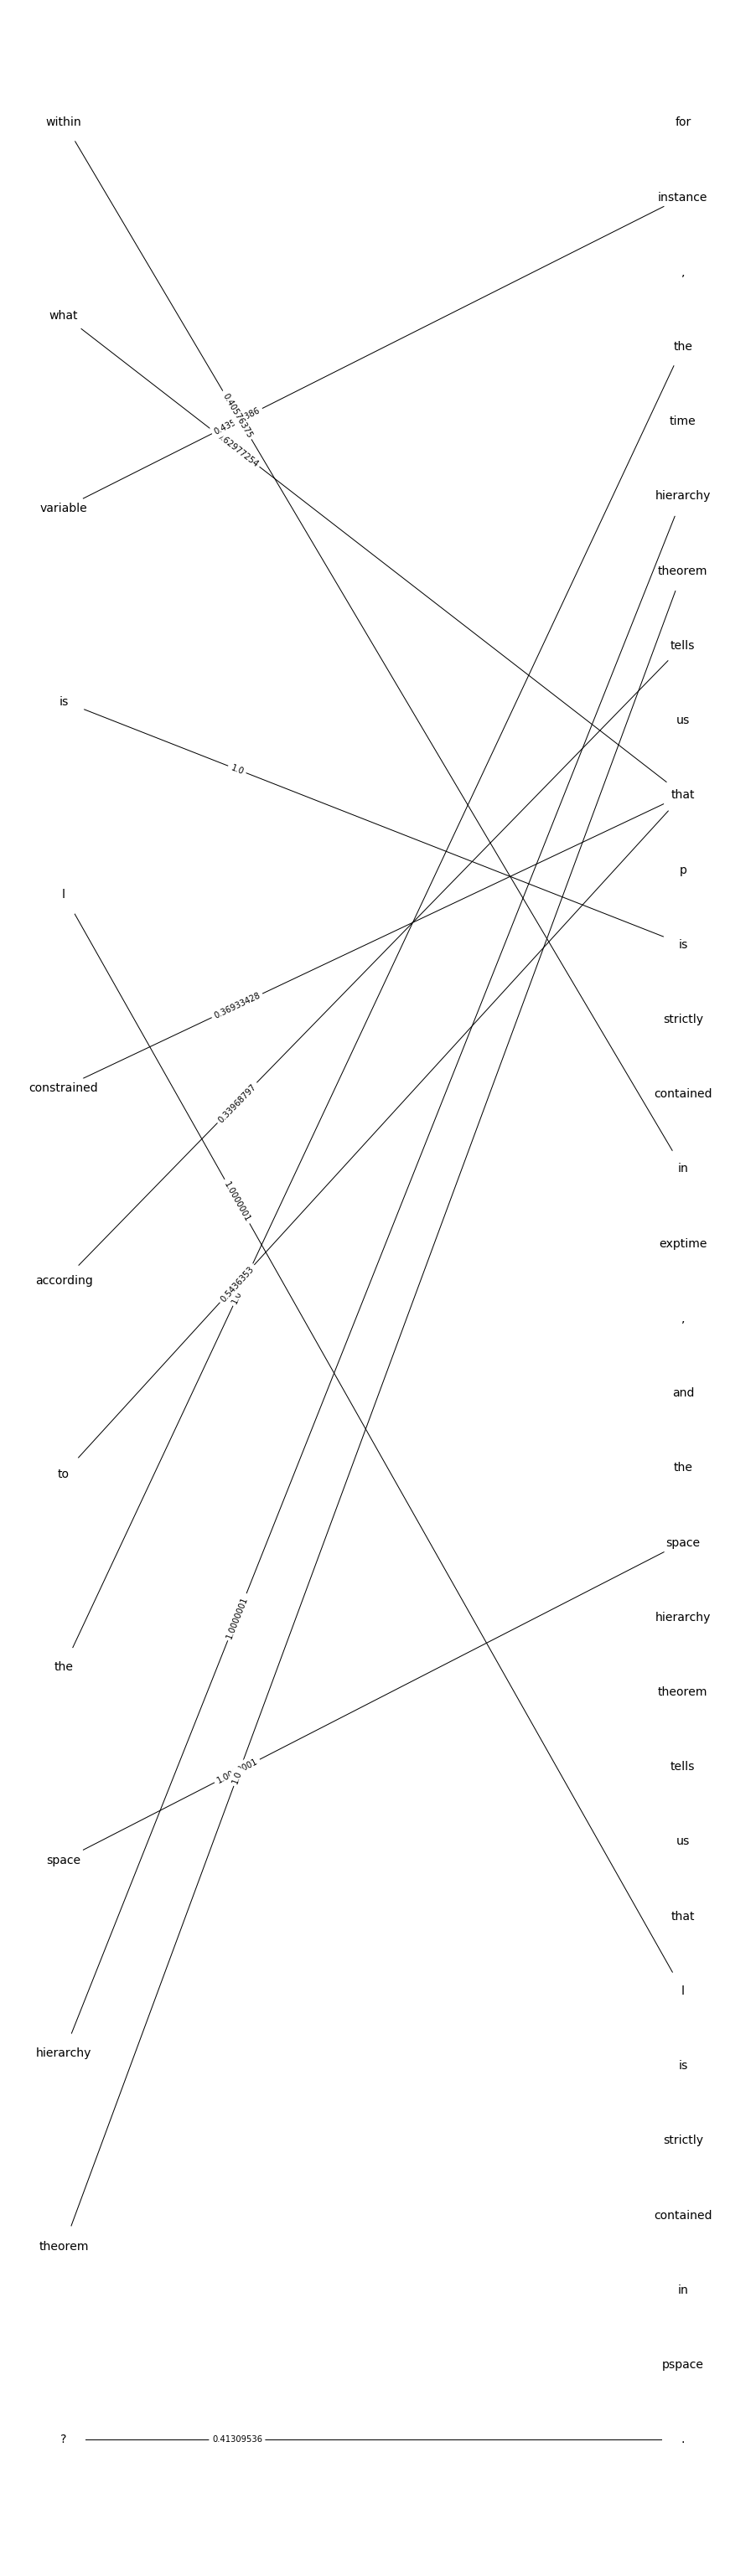

             within      what  variable        is         l  constrained  \
for        0.308733  0.301719  0.194392  0.432681  0.080091     0.279250   
instance   0.327920  0.386204  0.435124  0.331548  0.134896     0.341843   
,          0.251314  0.308747  0.181792  0.469191  0.271445     0.268571   
the        0.398275  0.427457  0.182879  0.582367  0.187706     0.230898   
time       0.254144  0.363193  0.201898  0.251874  0.092732     0.234209   
hierarchy  0.219932  0.210707  0.240200  0.129258  0.020818     0.335877   
theorem    0.087198  0.270768  0.344981  0.236793  0.106706     0.323890   
tells      0.146231  0.396252  0.109024  0.296757  0.122230     0.135824   
us         0.103034  0.320817  0.113260  0.180824  0.187564     0.158026   
that       0.337989  0.629773  0.277720  0.399548  0.118781     0.369334   
p          0.129451  0.185865  0.209132  0.117572  0.304085     0.167834   
is         0.301356  0.288376  0.284299  1.000000  0.182230     0.233509   
strictly   0

In [85]:
Alignement_graph_bipartite( "Within what variable is L constrained according to the space hierarchy theorem?","For instance, the time hierarchy theorem tells us that P is strictly contained in EXPTIME, and the space hierarchy theorem tells us that L is strictly contained in PSPACE.",[((4, 25), 1.0000001), ((9, 19), 1.0000001), ((10, 5), 1.0000001), ((3, 11), 1.0), ((8, 3), 1.0), ((11, 6), 1.0), ((1, 9), 0.62977254), ((7, 9), 0.5436353), ((2, 1), 0.43512386), ((12, 31), 0.41309536), ((0, 14), 0.40576375), ((5, 9), 0.36933428), ((6, 7), 0.33968797)])
affiche_table_cosine("Within what variable is L constrained according to the space hierarchy theorem?","For instance, the time hierarchy theorem tells us that P is strictly contained in EXPTIME, and the space hierarchy theorem tells us that L is strictly contained in PSPACE.")
question=" Within what variable is L constrained according to the space hierarchy theorem? "
sequence=" For instance, the time hierarchy theorem tells us that P is strictly contained in EXPTIME, and the space hierarchy theorem tells us that L is strictly contained in PSPACE. "
print("question = ", question)
print("sequence = ",sequence)
print("span output: hierarchy theorem tells us that ")
print("reponses attendu: [{'answer_start': 268, 'text': 'PSPACE'}, {'answer_start': 268, 'text': 'PSPACE'}, {'answer_start': 268, 'text': 'PSPACE'}] ")

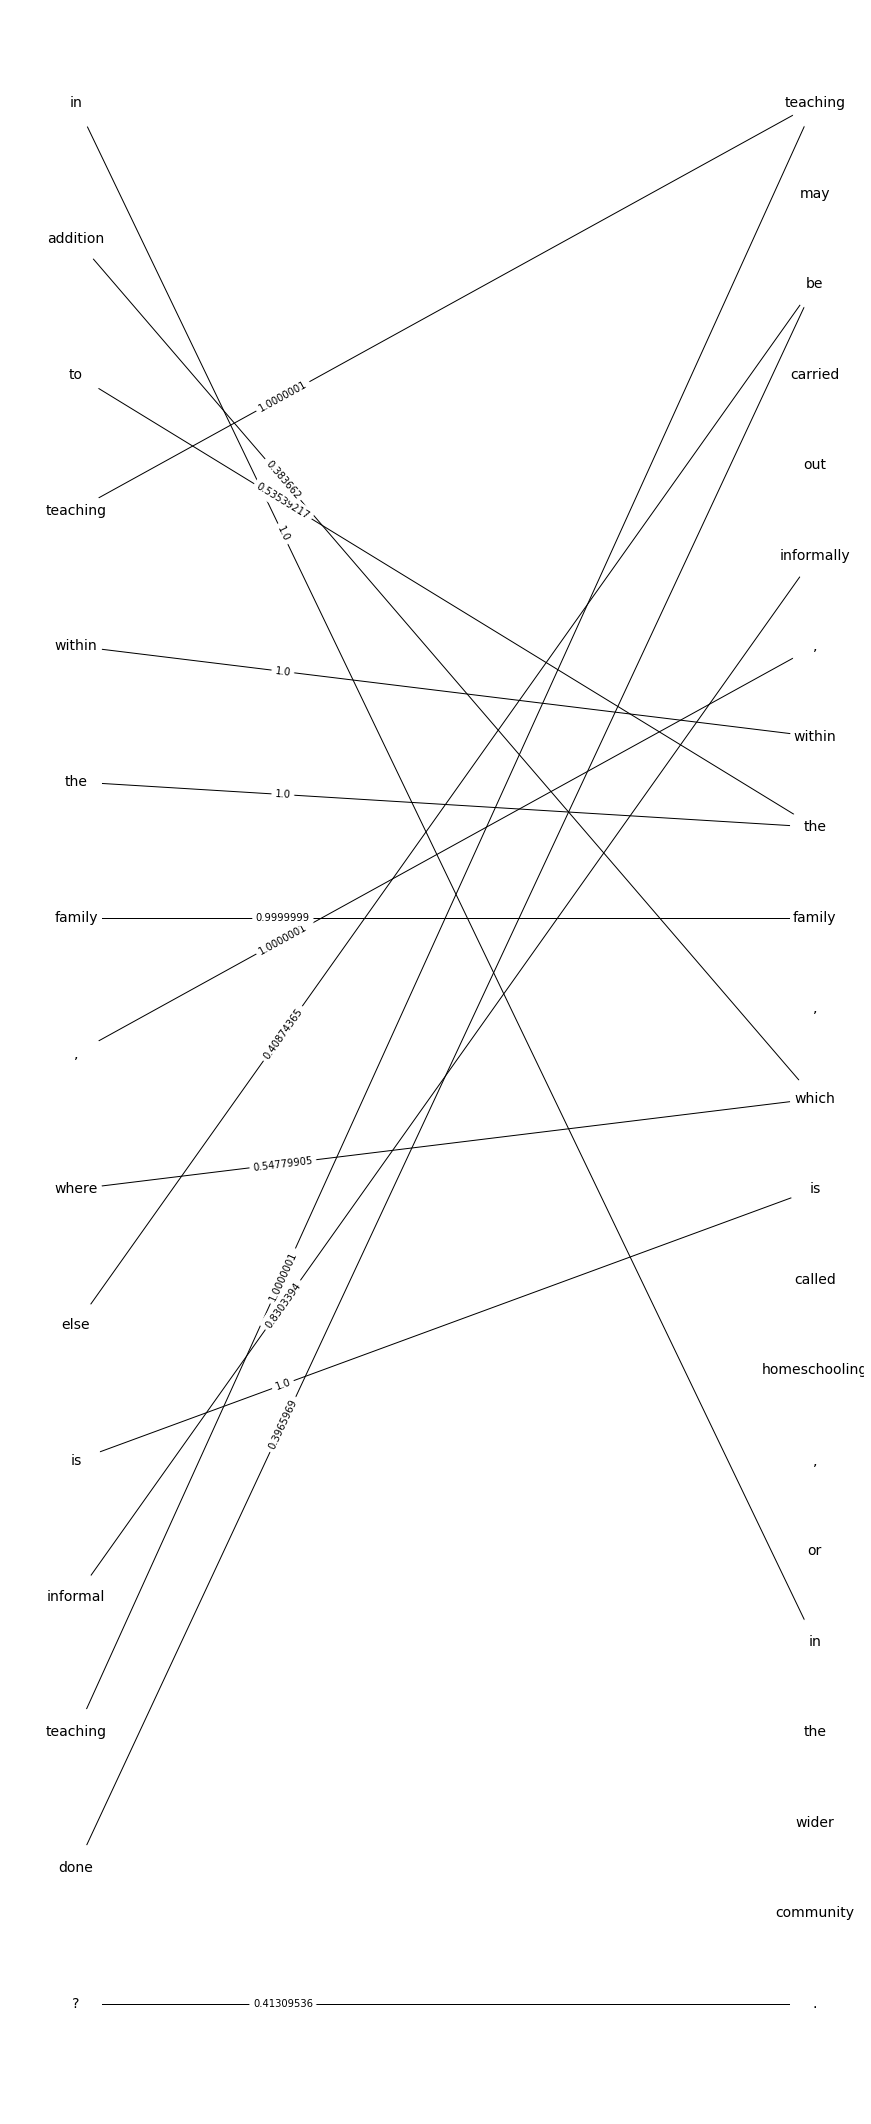

                     in  addition        to  teaching    within       the  \
teaching       0.265906  0.225425  0.276213  1.000000  0.202227  0.218269   
may            0.342415  0.212908  0.391583  0.176098  0.213524  0.269429   
be             0.348182  0.347874  0.497284  0.209657  0.290548  0.424814   
carried        0.226890  0.200323  0.218675  0.168895  0.146585  0.318550   
out            0.357621  0.200683  0.423870  0.179500  0.217271  0.394045   
informally     0.238348  0.192662  0.331745  0.180801  0.254943  0.327887   
,              0.520147  0.304020  0.442459  0.254709  0.251314  0.493308   
within         0.405764  0.246206  0.349802  0.202227  1.000000  0.398275   
the            0.666239  0.329554  0.535392  0.218269  0.398275  1.000000   
family         0.216600  0.156298  0.212850  0.200105  0.199812  0.239485   
,              0.520147  0.304020  0.442459  0.254709  0.251314  0.493308   
which          0.484052  0.383662  0.534506  0.228606  0.435397  0.652182   

In [87]:
Alignement_graph_bipartite( "In addition to teaching within the family, where else is informal teaching done?","Teaching may be carried out informally, within the family, which is called homeschooling, or in the wider community.",[((3, 0), 1.0000001), ((7, 6), 1.0000001), ((12, 0), 1.0000001), ((0, 17), 1.0), ((4, 7), 1.0), ((5, 8), 1.0), ((10, 12), 1.0), ((6, 9), 0.9999999), ((11, 5), 0.8303394), ((8, 11), 0.54779905), ((2, 8), 0.53539217), ((14, 21), 0.41309536), ((9, 2), 0.40874365), ((13, 2), 0.3965969), ((1, 11), 0.383662)])
affiche_table_cosine("In addition to teaching within the family, where else is informal teaching done?","Teaching may be carried out informally, within the family, which is called homeschooling, or in the wider community.")
question=" In addition to teaching within the family, where else is informal teaching done? "
sequence=" Teaching may be carried out informally, within the family, which is called homeschooling, or in the wider community. "
print("question = ", question)
print("sequence = ",sequence)
print("span output: called homeschooling , or ")
print("reponses attendu: [{'answer_start': 96, 'text': 'the wider community'}, {'answer_start': 100, 'text': 'wider community'}, {'answer_start': 93, 'text': 'in the wider community'}] ")